In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('BlackFriday.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [4]:
df.nunique()

User_ID                        5891
Product_ID                     3623
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               18
Product_Category_2               17
Product_Category_3               15
Purchase                      17959
dtype: int64

In [5]:
df.isnull().sum()
# we can see that null values of prod_cat 2 and 3 constitute approx 60% of the data, so we cannot remove the rows. Instead we are removing these 2 columns

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [6]:
#del df['Product_Category1']
#del df['Product_Category_2']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


## Analyzing Gender

In [7]:
x=df.groupby(by='Gender').size()
# it's a series, we will convert it to data frame
x=x.to_frame(name='Ratio')
x
# (df['Gender'].value_counts()) (gives the same result)

,Ratio
Gender,
F,132197
M,405380


<Axes: ylabel='Ratio'>

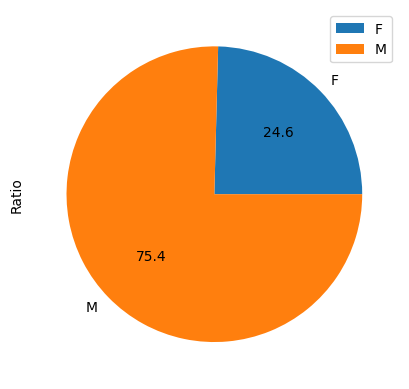

In [8]:
x.plot.pie(y='Ratio',autopct='%.1f')

In [9]:
# let's see how much money each gender has spent
x=df.groupby('Gender')['Purchase'].sum()
x=x.to_frame(name='Total_spending')
x

,Total_spending
Gender,
F,1164624021
M,3853044357


array([<Axes: ylabel='Total_spending'>], dtype=object)

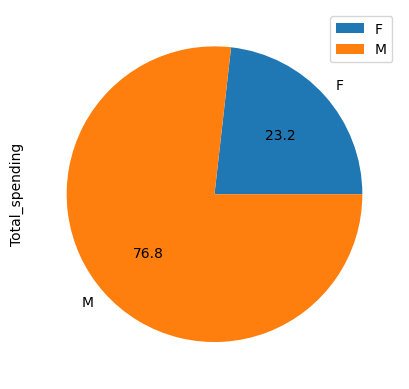

In [10]:

x.plot(subplots=True,kind='pie',autopct='%.1f')

## Analyzing age and martial status

In [11]:
lst=[]
for i in df['Age'].unique():
    lst.append([i,len(df[df['Age']==i])])
lst

[['0-17', 14707],
 ['55+', 20903],
 ['26-35', 214690],
 ['46-50', 44526],
 ['51-55', 37618],
 ['36-45', 107499],
 ['18-25', 97634]]

In [12]:
data=pd.DataFrame(lst,columns=['age_group','number_of_purchases'])
data
# this whole could also be written through groupby function and count_values function(we done this in gender analysis)

,age_group,number_of_purchases
0,0-17,14707
1,55+,20903
2,26-35,214690
3,46-50,44526
4,51-55,37618
5,36-45,107499
6,18-25,97634


<Axes: xlabel='age_group'>

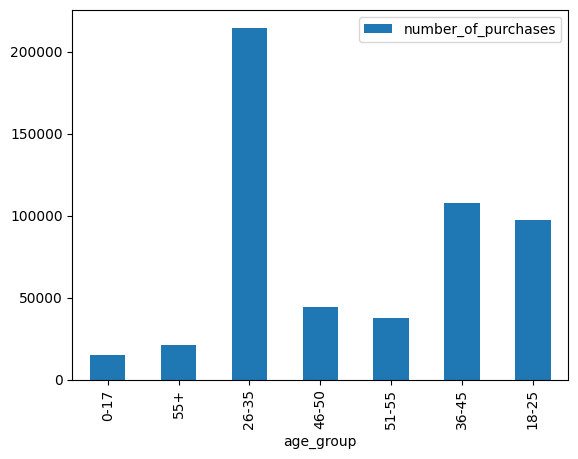

In [13]:
data.plot(kind='bar',x='age_group')

<Axes: xlabel='Age'>

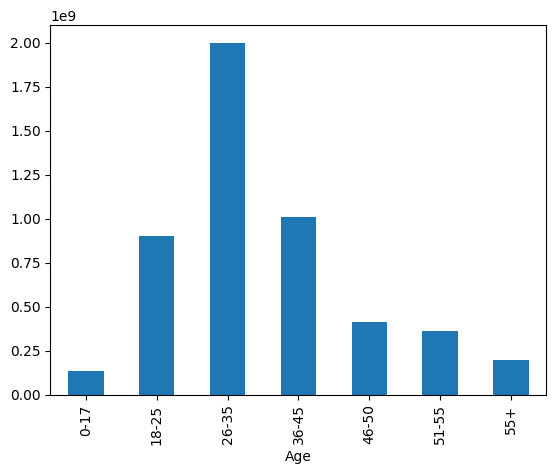

In [14]:
# total spending of each group
df.groupby('Age')['Purchase'].sum().plot.bar(x='Age')

## Multi-column Analysis

<Axes: xlabel='City_Category', ylabel='count'>

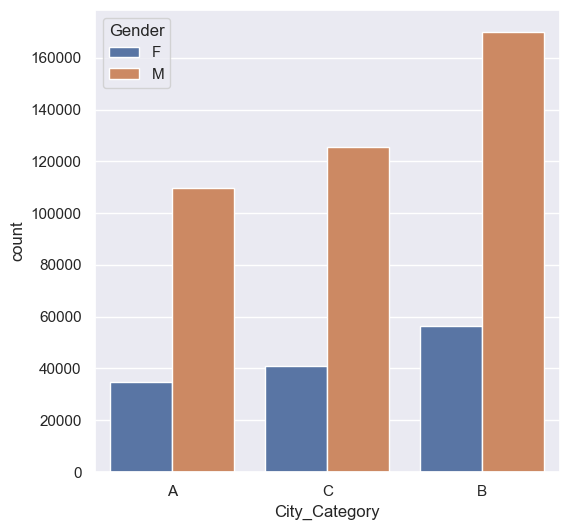

In [15]:

sns.set(rc={'figure.figsize':(6,6)})
sns.countplot(x='City_Category',data=df,hue='Gender')
# Likewise we can do this for other columns also.

<Axes: >

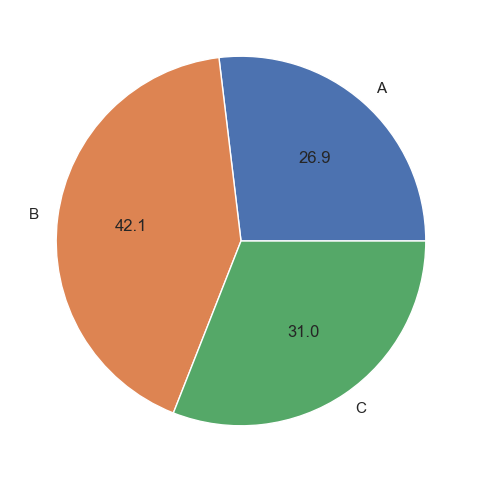

In [16]:
df.groupby('City_Category').size().plot(kind='pie',autopct='%.1f')
# i.e. maximum number of products are bought in city B.

<Axes: ylabel='Purchase'>

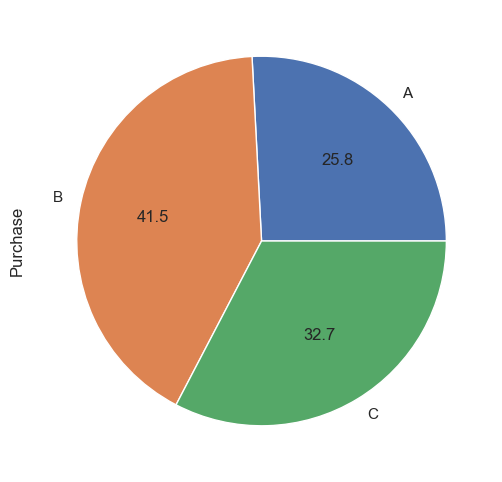

In [17]:
df.groupby('City_Category')['Purchase'].sum().plot(kind='pie',autopct='%.1f')
# i.e. maximum amount is spent by city B people

<Axes: ylabel='Purchase'>

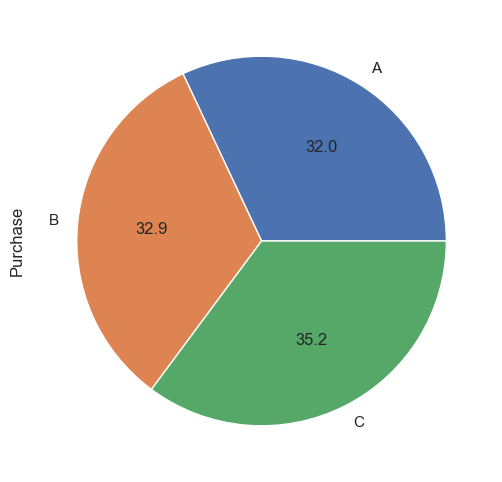

In [18]:
df.groupby('City_Category')['Purchase'].mean().plot(kind='pie',autopct='%.1f')
# The purchasing power is maximum for city C people


## Analysing Occupation

<Axes: xlabel='Occupation'>

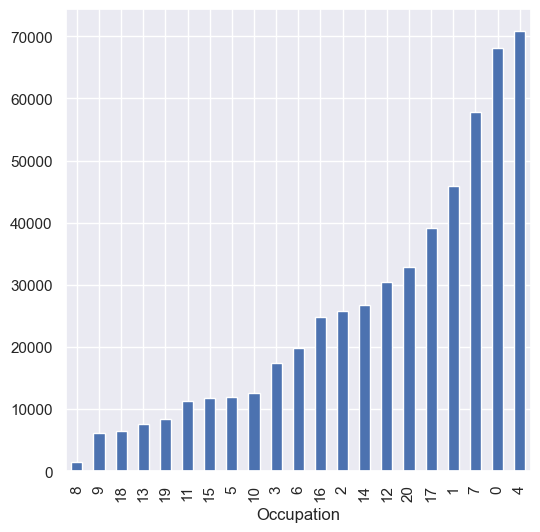

In [19]:
df.groupby('Occupation').size().sort_values().plot(kind='bar')

<Axes: xlabel='Occupation', ylabel='count'>

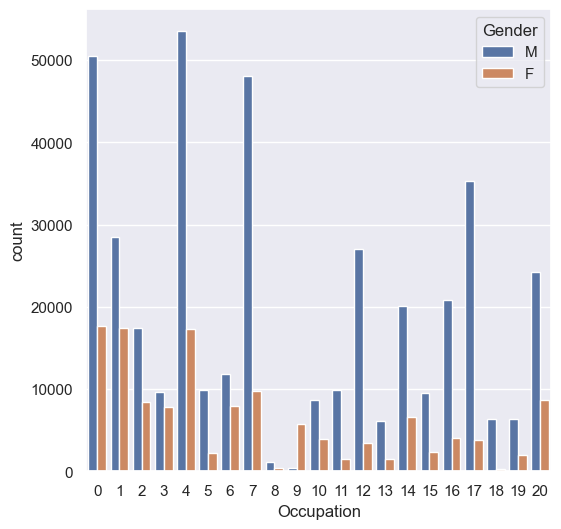

In [20]:
sns.countplot(x='Occupation',data=df,hue='Gender')

<Axes: xlabel='Occupation'>

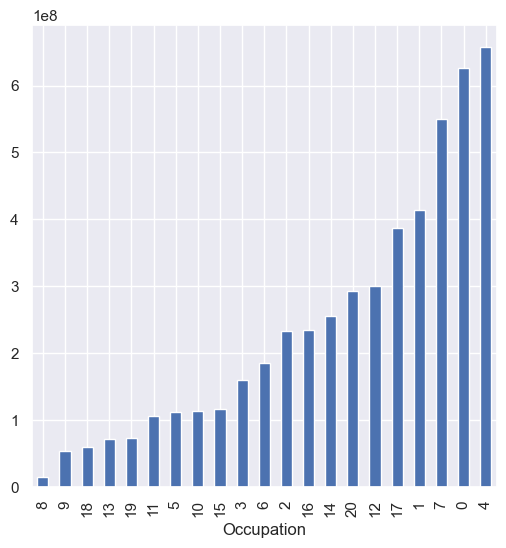

In [21]:
df.groupby('Occupation')['Purchase'].sum().sort_values().plot(kind='bar')

<Axes: xlabel='Occupation'>

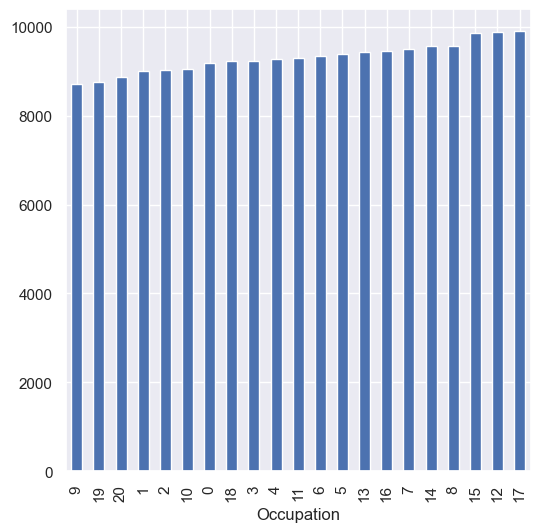

In [22]:
df.groupby('Occupation')['Purchase'].mean().sort_values().plot(kind='bar')
# through this we can see that although the city 4 people have purchased more but the purchasing power of city 17 people is maximum

<Axes: xlabel='Occupation'>

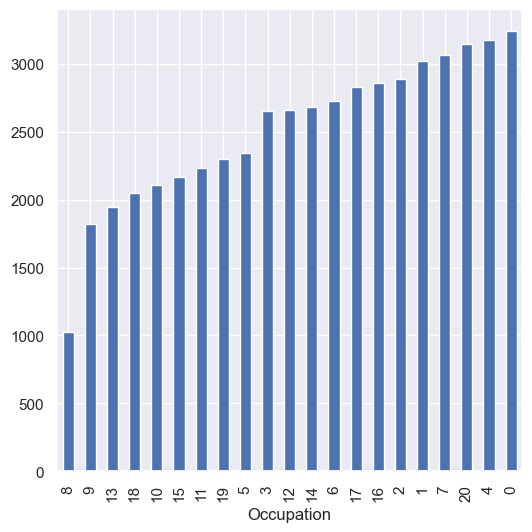

In [23]:
# let's see how much unique products each population bought
df.groupby('Occupation')['Product_ID'].nunique().sort_values().plot(kind='bar')

<Axes: xlabel='Product_Category_3'>

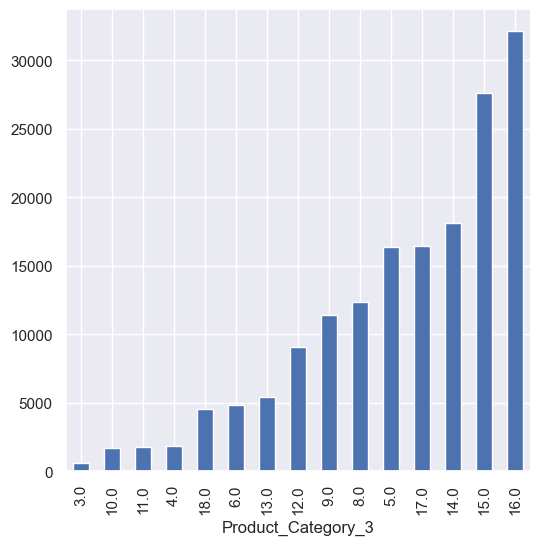

In [24]:
# let's see which product category is bought the most
df.groupby('Product_Category_3').size().sort_values().plot(kind='bar')

<Axes: xlabel='Product_Category_3'>

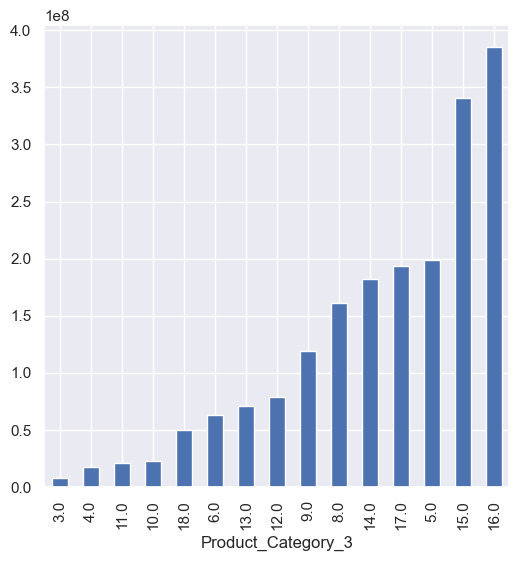

In [25]:
df.groupby('Product_Category_3')['Purchase'].sum().sort_values().plot(kind='bar')

<Axes: xlabel='Product_Category_3'>

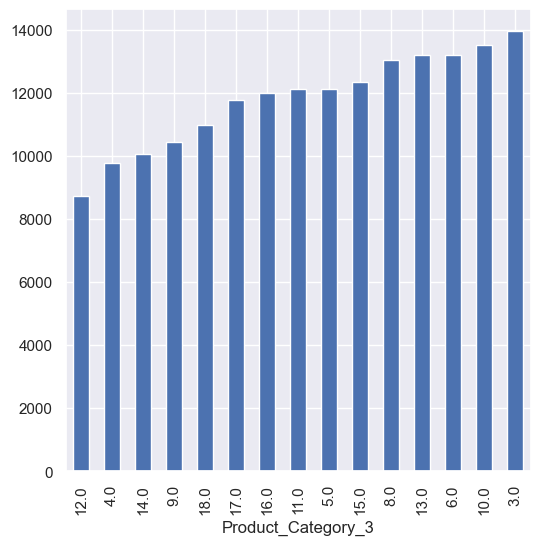

In [26]:
df.groupby('Product_Category_3')['Purchase'].mean().sort_values().plot(kind='bar')
# we can see that most expensive products are from category 3.0

<Axes: xlabel='Product_ID'>

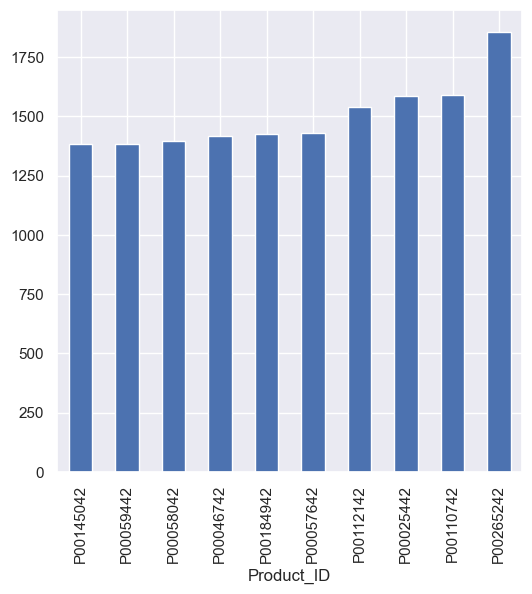

In [27]:
#The top 10 products which are sold the most
df.groupby('Product_ID').size().nlargest(10).sort_values().plot(kind='bar')

<Axes: xlabel='Product_ID'>

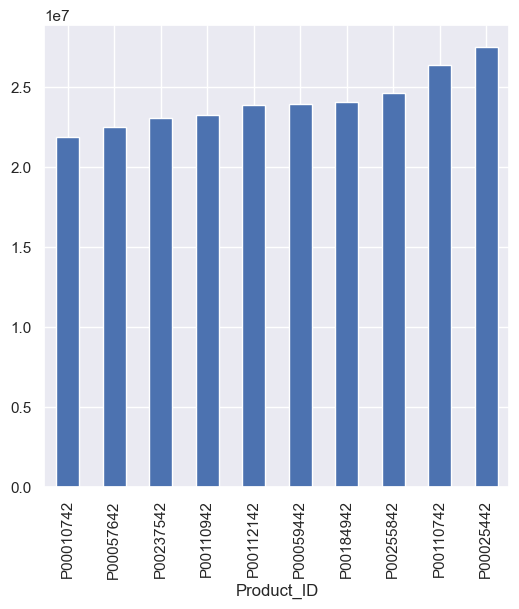

In [28]:
# On which product people spend the most
df.groupby('Product_ID')['Purchase'].sum().nlargest(10).sort_values().plot(kind='bar')

## Combining gender and martial status

In [31]:
# we will create a new column of maritial gender


df['Marital_Gender']=df['Gender']+'_'+df['Marital_Status'].astype(str)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Marital_Gender
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969,M_0


<Axes: xlabel='Marital_Gender', ylabel='count'>

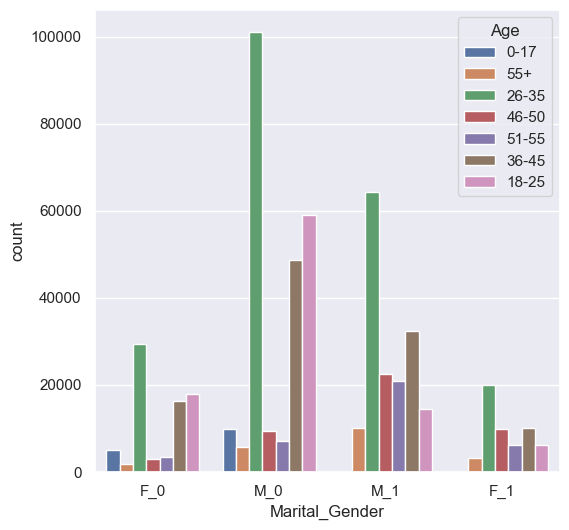

In [35]:
sns.countplot(data=df,x='Marital_Gender',hue="Age")